# Part II - Data Explanatory Analysis
_Research project completed by Allysa Grace Fontillas for Udacity's Data Analyst Nanodegree Program | December 02, 2023_

## Table of Contents
<li><a href="#Investigation Overview">Investigation Overview</a></li>
<li><a href="#Dataset Overview and Summary">Dataset Overview and Summary</a></li>
<li><a href="#Visualization">Visualization</a></li>
<li><a href="#Visualization">Visualization</a></li>
<li><a href="#Visualization">Visualization</a></li>
<li><a href="#Visualization">Visualization</a></li>
</ul>

### Investigation Overview

In the following analysis, I discuss findings I've gathered from wrangling and analyzing the Ford GoBike System dataset. My goal is to highlight key insights and their significance. In doing so, I hope to bring attention to important findings and encourage improvement of Ford GoBike's system.

The main topics I am going to address are:
- What trends do we see among the general Ford BikeShare user population?
- What are the top start stations?
- When do top stations thrive?
- How does duration among the top stations look on different days?

### Dataset Overview and Summary
The Ford GoBike System dataset contains information about individual rides in the San Francisco Bay Area from Ford's bike-sharing program. It contains 174,951 entries and 19 columns that pertain to user details or ride details. This dataset contains ride information for February and March of 2019. 

In [1]:
#Imports the libraries I'll be using
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Loads in the clean datasets; one for general user population, other focuses on top 7 start stations
cleanData = pd.read_csv('clean201902_fordgobike.csv')
startStations = pd.read_csv('clean_stationsfordgobike.csv')

### Visualization

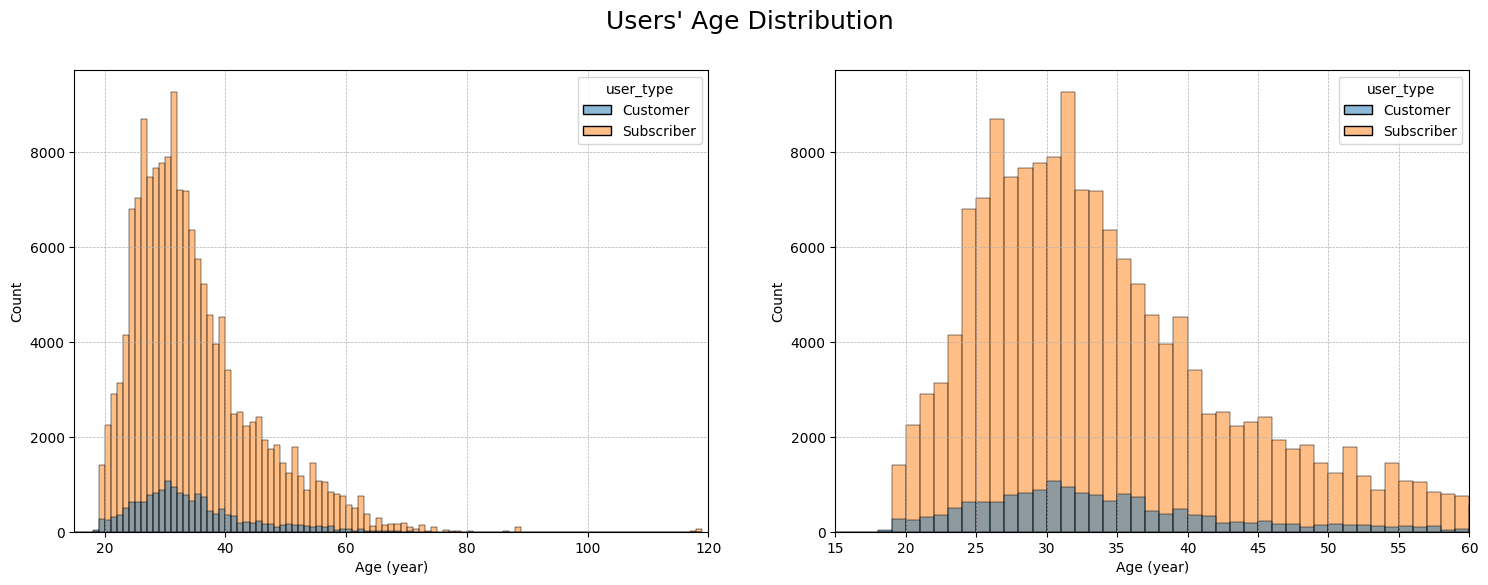

In [3]:
#Setting up the figure for 2 plots side by side
plt.figure(figsize=[18,6])

#Histogram (on the left axis)
plt.subplot(1, 2, 1)
bins= np.arange(0, cleanData['user_age'].max()+1, 1)
sns.histplot(data=cleanData, x='user_age', hue='user_type', bins=bins);
plt.xlim(15,120);
plt.grid(True, linewidth='.5', linestyle='--')
plt.xlabel('Age (year)');

#Close up (on the right axis)
plt.subplot(1, 2, 2)
sns.histplot(data=cleanData, x='user_age', hue='user_type', bins=bins);
plt.xlim(15,60);
plt.grid(True, linewidth='.5', linestyle='--')
plt.xlabel('Age (year)');
plt.suptitle("Users' Age Distribution", fontsize=18);

The subscriber graph presents a slightly bimodal distribution with a rightward skew. The subscriber graph peaks at around 26 years old and a second peak at around 31 years old.

The customer graph is unimodal. It has a rightward skew with a peak at approximately 30 years old.

Overall, the minimum age is 18 and the maximum age is 119.
From the graph, we can see that most users in Ford's GoBike system are around 23-40 years old. A majority of the users in the system are subscribers.

<u>Action:</u> It's understandable that a large amount of users are around 23-40 years old. However, GoBike can attract more clients of varying age groups by advertising their services in a different manner. Rather than being seen as a "transit company", they can attempt to attract clients of the older population by emphasizing a focus on health and wellness. This can also increase attraction from health-conscious young-adults. Ford BikeShare can further increase their appeal by emphasizing benefits such as users not having to pay fees for bike maintenance and storage in a congested city like San Francisco. 

### Visualization

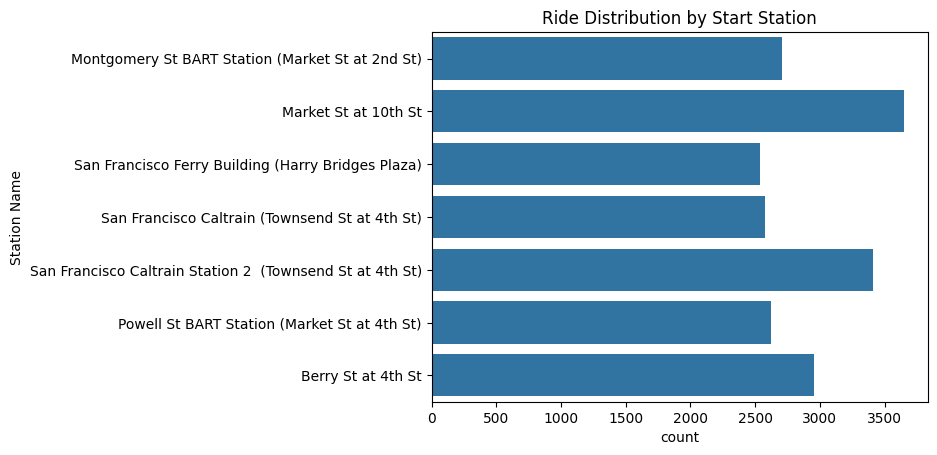

In [4]:
sns.countplot(data=startStations, y='start_station_name');
plt.title("Ride Distribution by Start Station", fontsize=12);
plt.ylabel('Station Name');

These are the top 7 start stations with the highest amount of bike rides. Market St at 10th St and San Francisco Caltrain Station 2 are the most popular start stations among Ford BikeShare users. San Francisco Ferry Building has the lowest amount of rides.

*Notice* most of these stations are located at a transportation system such as BART, CalTrain, and Ferry. Market St is also well-known for its shops and establishments. It is apparent that the location of a station plays a large role in their popularity among BikeShare users.

<u>Action:</u> It is ideal for Ford BikeShare to continue placing their services within reach of locations that are at or near transportation systems. It is also beneficial for them to place their bike services near popular market areas in San Francisco. This should be done with caution as to ensure the bikes are not placed in a way where they can be easily stolen or vandalized.

### Visualization

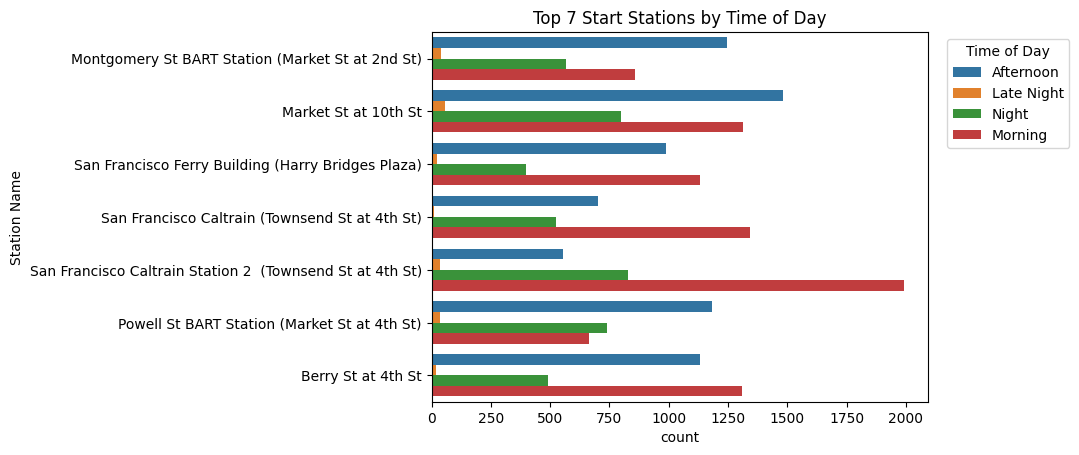

In [5]:
#Plots countplot
sns.countplot(data=startStations, y='start_station_name', hue='start_time_of_day');
plt.title('Top 7 Start Stations by Time of Day', fontsize=12);
plt.legend(title='Time of Day', bbox_to_anchor=(1.3,1));
plt.ylabel('Station Name');

- Most rides at San Francisco Caltrain Station 2, San Francisco CalTrain, Berry St at 4th St, and San Francisco Ferry Building begin in the morning from *5AM-11AM*.
- Most rides at Market St at 10th St, Montgomery St BART Station, and Powell St BART Station occur in the afternoon from *12PM-5PM*.
- The amount of Montgomery St BART Station's morning rides and afternoon rides are almost equivalent; there are about 200 more rides in the afternoon than there are in the morning.
- San Francisco Caltrain Station 2 has about 1500 more rides in the morning than in the afternoon.
- San Francisco Caltrain has about 550 more rides in the morning than in the afternoon.
- San Francisco Caltrain Station 2 gets more rides at night compared to other top stations.
  
<u>Action:</u> There is a great demand for bike rides in the morning at the San Francisco Caltrain Station 2. There is also a decent demand for bike rides in the morning at San Francisco Caltrain. These 2 stations are located near one another at "Townsend St at 4th St". To keep up with the demand, it would be ideal for Ford BikeShare to ensure that they have enough bikes around this area. It's important to ensure that bike-share demand is met in popular start stations. It's also important to ensure that bikes that are not in use are securely locked, especially during late night hours (*11PM-4AM*) when there is less demand.

### Visualization

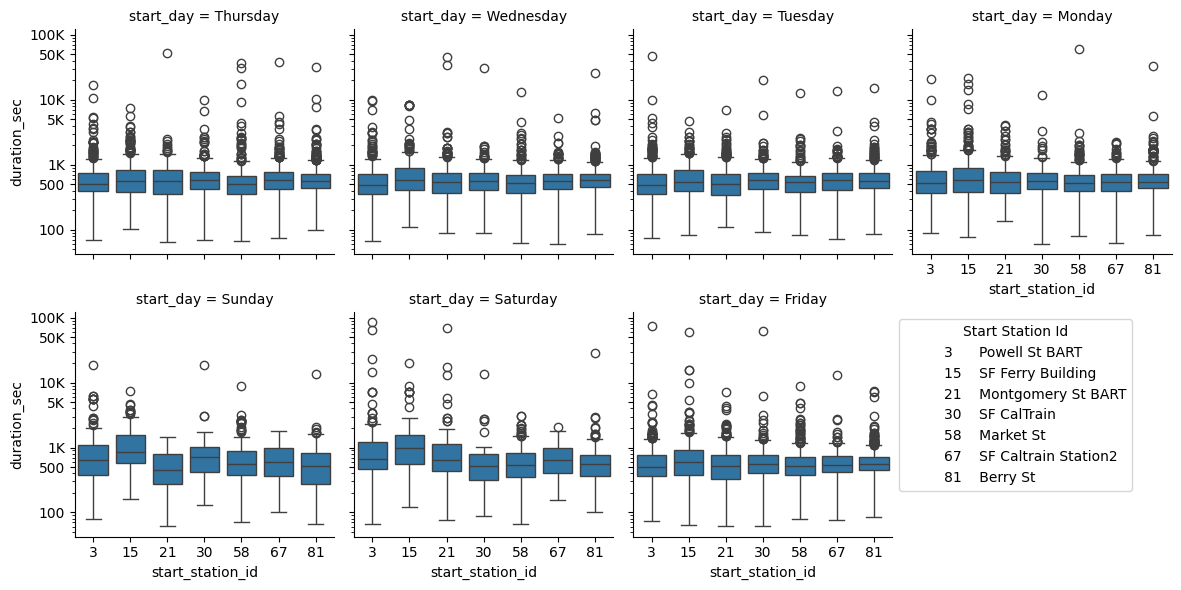

In [6]:
#Same variables as above but in a faceted histogram
g = sns.FacetGrid(startStations, col='start_day', col_wrap=4, margin_titles=True)
g.map_dataframe(sns.boxplot, x='start_station_id', y='duration_sec');

#Sets up custom margin_titles
for ax in g.axes.flat:
    ax.set(yscale='log')
    numyticks = [100, 500, 1000, 5000, 10000, 50000, 100000]
    label = [f'{int(n/1000)}K' if n%1000==0 else f'{n}' for n in numyticks]
    plt.yticks(numyticks, label);


l = plt.legend(['3      Powell St BART', '15    SF Ferry Building', '21    Montgomery St BART', '30    SF CalTrain', '58    Market St', '67    SF Caltrain Station2',
            '81    Berry St'], title='Start Station Id', bbox_to_anchor=(1,1));
for entry in l.legend_handles:
    entry.set(alpha=0)

`start_station_id` 15 (San Francisco Ferry Building) tends to have a greater upper quartile and greater median duration than most stations on most days. This can be seen on Sunday, Monday, Wednesday, Friday, and Saturday. This station tends to have the longest durations throughout the most of the week.

`start_station_id` 30 (San Francisco CalTrain) and `start_station_id` 67 (San Francisco CalTrain Station 2) tend to have higher ride durations than the San Francisco Ferry Building on Tuesdays.

<u>Action:</u> `start_station_id` 15 (San Francisco Ferry Building) is a prominent building and ferry terminal in San Francisco, so it would make sense for it to attract a lot of visitors. It also has a tendency to have longer ride durations. It would be beneficial for Ford BikeShare to place their bikes near areas that attract a lot of tourists such as the San Francisco Ferry Building or in downtown San Francisco.